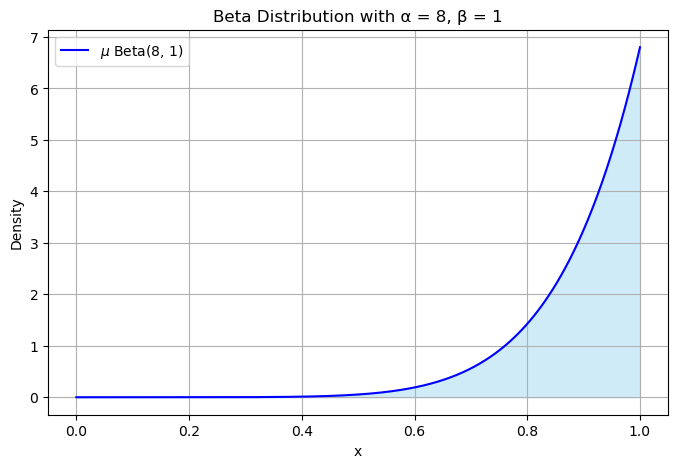

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def plot_beta_distribution(alpha, beta_param, num_points=1000):
    """
    Plots the Beta distribution for given alpha and beta parameters.

    Parameters:
    alpha (float): Alpha shape parameter of the Beta distribution.
    beta_param (float): Beta shape parameter of the Beta distribution.
    num_points (int): Number of points for the plot (default is 1000).
    """
    x = np.linspace(0, 1, num_points)
    y = 0.85*beta.pdf(x, alpha, beta_param)

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label=fr'$\mu$ Beta({alpha}, {beta_param})', color='b')
    plt.fill_between(x, y, color="skyblue", alpha=0.4)
    plt.title(f'Beta Distribution with α = {alpha}, β = {beta_param}')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.savefig("(i)beta1,1.png")
    plt.grid(True)
    plt.show()

# Example usage
plot_beta_distribution(8, 1)


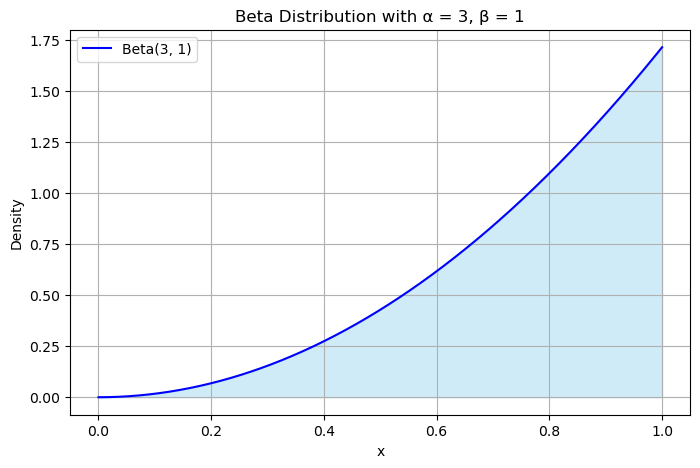

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def plot_beta_distribution(alpha, beta_param, num_points=1000):
    """
    Plots the Beta distribution for given alpha and beta parameters.

    Parameters:
    alpha (float): Alpha shape parameter of the Beta distribution.
    beta_param (float): Beta shape parameter of the Beta distribution.
    num_points (int): Number of points for the plot (default is 1000).
    """
    x = np.linspace(0, 1, num_points)
    y = 1/2*beta.pdf(x, alpha, beta_param)

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label=f'Beta({alpha}, {beta_param})', color='b')
    plt.fill_between(x, y, color="skyblue", alpha=0.4)
    plt.title(f'Beta Distribution with α = {alpha}, β = {beta_param}')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.savefig("beta1,1.png")
    plt.grid(True)
    plt.show()

# Example usage
plot_beta_distribution(1, 1)


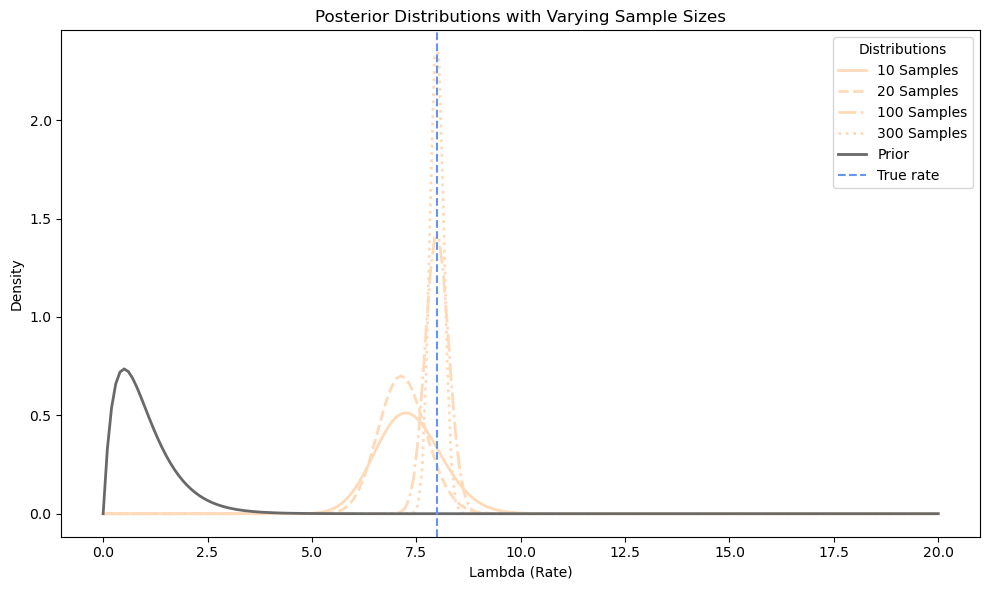

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, gamma, poisson 

def generate_observed_data(true_rate: int, observed_samples: int) -> np.array:
    return np.random.poisson(true_rate, observed_samples)

def generate_prior(a: int, b: int, lambdas: np.array) -> np.array:
    loc = 0 
    
    return gamma.pdf(lambdas, a=a, scale=1/b)

def posterior_parameters(x: np.array, a: int, b:int) -> np.array:
    N = len(x)
    T = np.sum(x)
    a = T + a 
    b = N + b
    return a, b 

a, b = 2,2
lambdas = np.linspace(0, 20, 200)
true_rate=8
observed_samples= 5

x = generate_observed_data(true_rate, observed_samples)
prior = generate_prior(a, b, lambdas)

a_new, b_new = posterior_parameters(x, a, b)
posterior = gamma.pdf(lambdas, a=a_new, scale=1/b_new)


sample_size = [10, 20, 100, 300]
all_samples = generate_observed_data(true_rate, sample_size[-1])

plt.figure(figsize=(10, 6))

a_all= []
b_all = []
for i, s in enumerate(sample_size):
    x = all_samples[0:s]
    line_styles = ['-', '--', '-.', ':']
    a_new, b_new = posterior_parameters(x, a, b)
    a_all.append(a_new) 
    b_all.append(b_new)
    posterior = gamma.pdf(lambdas, a=a_new, scale=1/b_new)
    plt.plot(lambdas, posterior, label=f"{s} Samples", linestyle = line_styles[i], color="peachpuff", linewidth=2)

plt.plot(lambdas, prior, label="Prior", color="dimgray", linewidth=2)
plt.axvline(x = true_rate, color = 'cornflowerblue' , linestyle = "--", label = 'True rate')

plt.xlabel("Lambda (Rate)")
plt.ylabel("Density")
plt.title("Posterior Distributions with Varying Sample Sizes")
plt.legend(title="Distributions", loc="upper right")
plt.tight_layout()

plt.show()


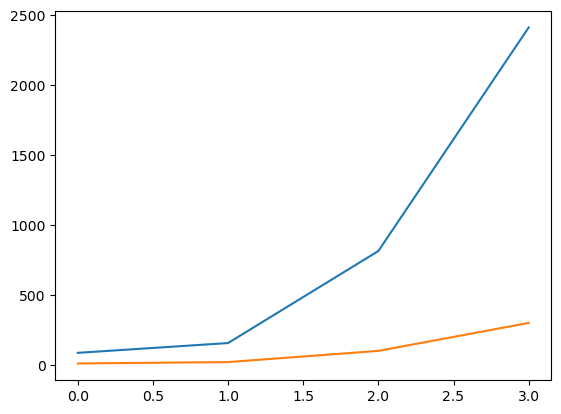

In [152]:
plt.plot(np.array(a_all))
plt.plot(np.array(b_all))